# Neural Networks For Image and Metadata prediction

In [88]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
# ML and DL
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, accuracy_score, precision_score, recall_score, roc_auc_score
import itertools
import pandas as pd
import os

In [89]:
class MyDataset(Dataset):
    def __init__(self, X, Y, folder = 'train'):
        # Load the images from the id on X dataframe and folder path
        #X is the dataframe with the ids and metadata
        #Y is the dataframe with the labels
        self.X = X
        self.Y = Y
        self.folder = folder

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        img_name = os.path.join(self.folder, self.X.iloc[index]['Id'] + '.jpg')
        image = plt.imread(img_name)
        image = torch.from_numpy(image).float()
        #print("before")
        #print(image.shape)
        #print("after")
        #print(image.shape)
        image = image.permute(2,0,1)
        image = F.interpolate(image.unsqueeze(0), size=224, mode="nearest").squeeze(0)
        # Get the label of the image
        label = self.Y.iloc[index]
        metadata = torch.Tensor(self.X.iloc[index, 1:])
        return {'image': image, 'target': label, 'metadata': metadata}

In [90]:
def model_vis(title, train_loss, test_loss):
    
    min_index = np.argmin(test_loss)
    min_value = test_loss[min_index]
    
    # Plot the Training vs Epochs and Test vs Epochs
    plt.figure(figsize=(12,6))
    plt.subplot(1,1,1)
    plt.plot(range(len(train_loss)), train_loss, label='Training Loss')
    plt.plot(range(len(test_loss)), test_loss, label='Validation Loss')
    # Annotate the minimum value on the plot
    plt.annotate(f'Minimum: {min_index:.2f}', xy=(min_index, min_value), xytext=(min_index + 0.5, min_value + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title + ' - Loss')
    plt.show()

    return None

In [91]:
# Load the metadata file and concatenate it with the image data by id

train_data = pd.read_csv('train.csv')


X = train_data.drop('Pawpularity', axis=1) #except the last and the first(Id)
y = train_data['Pawpularity']/100.0

# Load the metadata file and concatenate it with the image data by id

train_data = pd.read_csv('train.csv')


X = train_data.drop('Pawpularity', axis=1) #except the last and the first(Id)
y = train_data['Pawpularity']/100.0

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = tts(X_train, y_train, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6343, 13)
y_train shape: (6343,)
X_val shape: (1586, 13)
y_val shape: (1586,)
X_test shape: (1983, 13)
y_test shape: (1983,)


# CNN Regressor

In [92]:
class CNNRegressor(nn.Module):
    def __init__(self, input_size):
        super(CNNRegressor, self).__init__()
        kernel_1 = 3
        padding_1 = 1
        stride_1 = 1
        out_filters_1 = 16
        self.conv1 = nn.Conv2d(in_channels=input_size[0], out_channels=out_filters_1, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        out_1 = int((input_size[1] - kernel_1 + padding_1 *2) / stride_1 + 1)
        print(out_1)
        self.fc1 = nn.Linear(out_filters_1 * out_1 * out_1 , 1) 

    def forward(self, x):
        #print(x.shape)
        x = self.conv1(x)
        #print(x.shape)
        x = self.relu(x)
        #print(x.shape)
        x = x.view(x.size(0), -1)
        #print(x.shape)
        x = self.fc1(x)
        return x

224


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([18])) that is different to the input size (torch.Size([18, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/100, Validation Loss: 4324.773266378822
Epoch 2/100, Validation Loss: 1418.8294019771254
Epoch 3/100, Validation Loss: 773.2096729204821
Epoch 4/100, Validation Loss: 504.26367616053363
Epoch 5/100, Validation Loss: 357.1813517307391
Epoch 6/100, Validation Loss: 283.2848961745409
Epoch 7/100, Validation Loss: 235.39341817921363
Epoch 8/100, Validation Loss: 205.08801771897024
Epoch 9/100, Validation Loss: 164.14455831269308
Epoch 10/100, Validation Loss: 151.43093679006117
Epoch 11/100, Validation Loss: 147.55486842721143
Epoch 12/100, Validation Loss: 134.3453356812807
Epoch 13/100, Validation Loss: 119.07665693592875
Epoch 14/100, Validation Loss: 151.26205099294847
Epoch 15/100, Validation Loss: 113.25587891125066
Epoch 16/100, Validation Loss: 109.54596914616877
Epoch 17/100, Validation Loss: 109.83150448586704
Epoch 18/100, Validation Loss: 287.5215019872678
Epoch 19/100, Validation Loss: 514.3819883674663
Epoch 20/100, Validation Loss: 3010.7023702283814
Epoch 21/100, Va

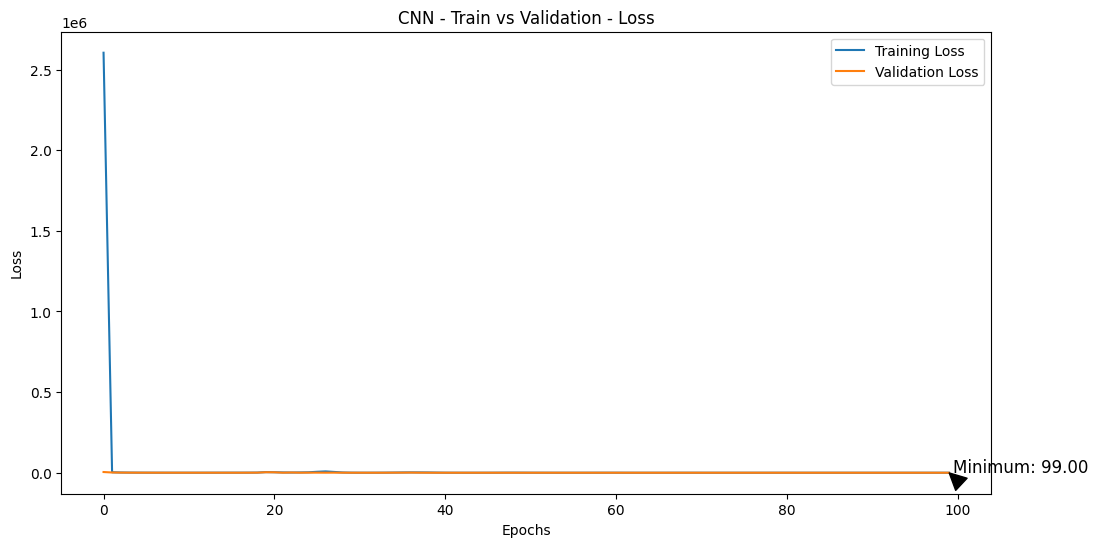

In [94]:
# Hyperparameters
batch_size = 32
learning_rate = 0.001
epochs = 100

# Create instances of the custom dataset
train_dataset = MyDataset(X_train, y_train, 'train')
val_dataset = MyDataset(X_val, y_val, 'train')

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Get the input size of the model
images, targets, metadata = next(iter(train_loader))['image'], next(iter(train_loader))['target'], next(iter(train_loader))['metadata']
input_size = images[0].shape
# Initialize the CNN regressor and define the loss function and optimizer
model = CNNRegressor(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_loss = []
validation_loss = []

# Training loop
for epoch in range(epochs):
    model.train()
    tr_loss = 0.0
    for batch in train_loader:
        images, targets, metadata = batch['image'], batch['target'], batch['metadata']
        images = images.to(torch.float32)
        targets = targets.to(torch.float32).view(-1, 1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, targets)
        tr_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_loss.append(tr_loss / len(train_loader))

    # Validation loop
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        for batch in val_loader:
            images, targets, metadata = batch['image'], batch['target'], batch['metadata']
            outputs = model(torch.Tensor(images))
            val_loss += criterion(outputs, targets).item()

        val_loss /= len(val_loader)
        validation_loss.append(val_loss)
        print(f'Epoch {epoch + 1}/{epochs}, Validation Loss: {val_loss}')

    # Save the model if the validation loss is the lowest we've seen so far
    if val_loss <= min(validation_loss):
        torch.save(model.state_dict(), 'model.pth')

# Plot the training and validation loss
model_vis('CNN - Train vs Validation', train_loss, validation_loss)

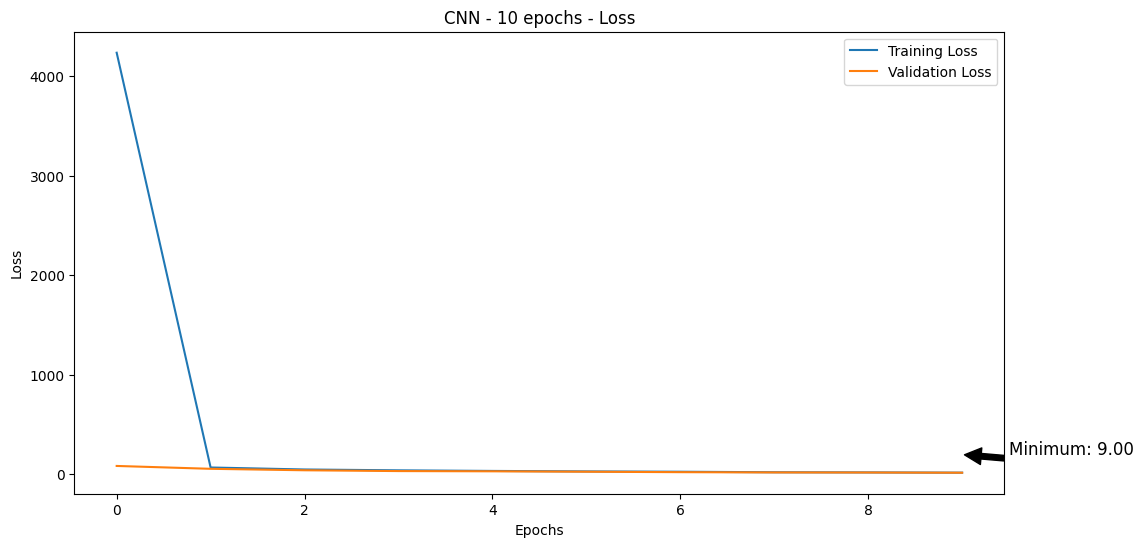

In [ ]:
min_index = np.argmin(validation_loss)
min_value = validation_loss[min_index]

# Plot the Training vs Epochs and Test vs Epochs
plt.figure(figsize=(12,6))
plt.subplot(1,1,1)
plt.plot(range(len(train_loss)), np.sqrt(train_loss), label='Training Loss')
plt.plot(range(len(validation_loss)), np.sqrt(validation_loss), label='Validation Loss')
# Annotate the minimum value on the plot
plt.annotate(f'Minimum: {min_index:.2f}', xy=(min_index, min_value), xytext=(min_index + 0.5, min_value + 0.1),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN - 10 epochs' + ' - Loss')
plt.show()

In [ ]:
# Get the test data

test_data = pd.read_csv('test_features.csv')

metadata = pd.read_csv('test0.csv')

# concatenate the metadata with the image data by Id collumn, drop the Pawpularity column from the metadata
test_data = pd.merge(test_data, metadata, on='Id', how='outer')

X_test = test_data.drop('Pawpularity', axis=1) 
y_test = test_data['Pawpularity']

In [ ]:
# Use the last model to predict the test data

test_dataset = MyDataset(X_test, y_test, 'train')
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

In [ ]:
# Test the model on the test data
model.eval()
with torch.no_grad():
    test_loss = 0.0
    for batch in test_loader:
        images, targets, metadata = batch['image'], batch['target'], batch['metadata']
        outputs = model(torch.Tensor(images))
        test_loss += criterion(outputs, targets).item()

    test_loss /= len(test_loader)
    test_loss = np.sqrt(test_loss)
    print(f'100 epoch Test Loss: {test_loss}')

10 epoch Test Loss: 10.42334065362357


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


# MLP

In [99]:
# Train a simple MLP model with the metadata using scikit-learn
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Load the metadata file and concatenate it with the image data by id

train_data = pd.read_csv('train.csv')


X = train_data.drop('Pawpularity', axis=1) #except the last and the first(Id)
y = train_data['Pawpularity']/100.0


# Split the data into training and validation sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

train_set = MyDataset(X_train, y_train, 'train')
test_set = MyDataset(X_test, y_test, 'train')

# Get a np array of the images and the labels
X_train = np.array([train_set[i]['metadata'] for i in range(len(train_set))])
y_train = np.array([train_set[i]['target'] for i in range(len(train_set))])

# Define the MLP model
mlp = MLPRegressor(random_state=42)

# Define the hyperparameters to search through
parameters = {'hidden_layer_sizes': [(100, 100, 100), (100, 100, 100, 100, 100)], 'activation': ['relu', 'tanh'], 'solver': ['adam'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'learning_rate': ['constant', 'adaptive'], 'learning_rate_init': [0.0001, 0.001, 0.01, 0.1]}
clf = GridSearchCV(mlp, parameters, n_jobs=-1, cv=5, verbose=2)

# Train the model
clf.fit(X_train, y_train)

# Get the best model
mlp = clf.best_estimator_

# Test the model on the test set
y_pred = mlp.predict(X_test)

# Get the metrics
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R2: {r2_score(y_test, y_pred)}')

# Plot the learning curve
plt.figure(figsize=(12,6))
plt.subplot(1,1,1)
plt.plot(clf.best_estimator_.loss_curve_)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MLP - Learning Curve')
plt.show()


Fitting 5 folds for each of 128 candidates, totalling 640 fits


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: '48d53aeabee4f92f77eee3a323343c77'

RMSE: 0.21008142728768273
R2: 0.0015693793031533732


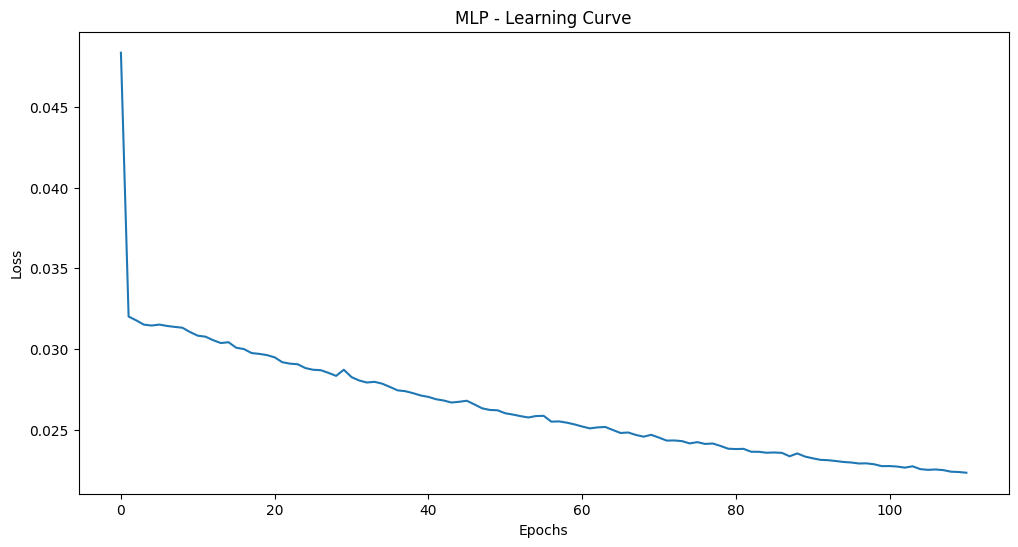

In [100]:
X_test = np.array([test_set[i]['metadata'] for i in range(len(test_set))])
y_test = np.array([test_set[i]['target'] for i in range(len(test_set))])

# Get the best model
mlp = clf.best_estimator_

# Test the model on the test set
y_pred = mlp.predict(X_test)

# Get the metrics
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R2: {r2_score(y_test, y_pred)}')

# Plot the learning curve
plt.figure(figsize=(12,6))
plt.subplot(1,1,1)
plt.plot(clf.best_estimator_.loss_curve_)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MLP - Learning Curve')
plt.show()

In [102]:
best_params = clf.best_params_
print(best_params)

{'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100, 100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}
